In [1]:
import sys
sys.path.append('../')

In [ ]:
import numpy as np
import q2_module as q2m
import os
from neuro_models.hopfield import *

In [3]:
folder_path = 'hw5_tifs'
file_names = os.listdir(folder_path)
tif_files = [f for f in file_names if f.endswith('.tif')]

n = 50
N = n**2

patterns_dict = {}
for tif_file in tif_files:
    patterns_dict[tif_file.rsplit('.', 1)[0]] = q2m.preprocess_image(folder_path + '/' + tif_file, n)

In [4]:
patterns_3 = np.array(list(patterns_dict.values())[:3]).reshape(3, N)
patterns_4 = np.array(list(patterns_dict.values())[:4]).reshape(4, N)

Storing 3 patterns
Perturbing patterns with probability p = 0


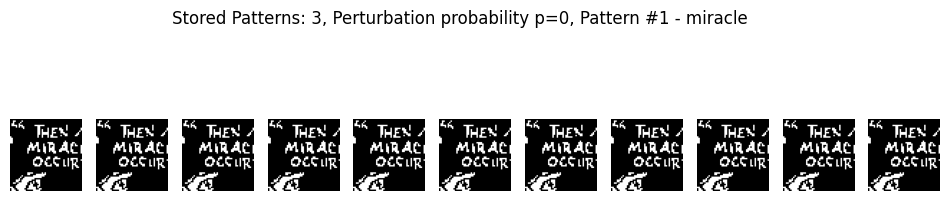

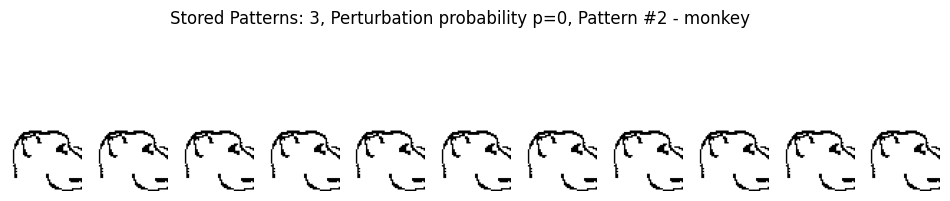

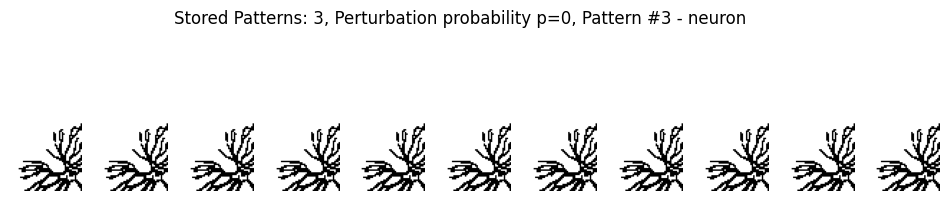

Perturbing patterns with probability p = 0.3


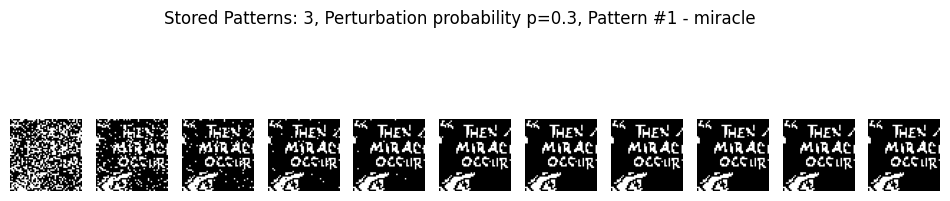

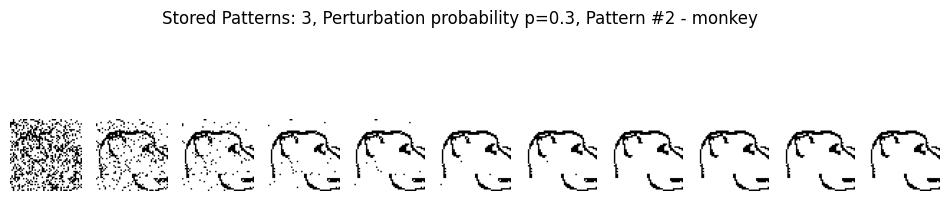

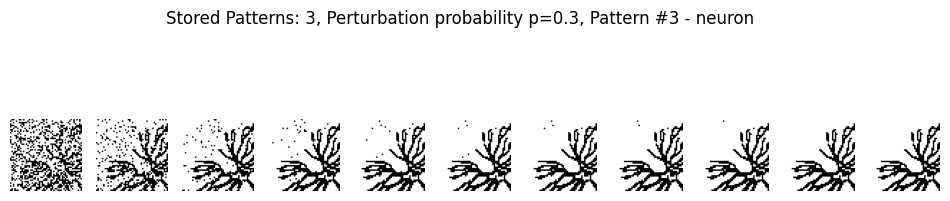

Perturbing patterns with probability p = 0.5


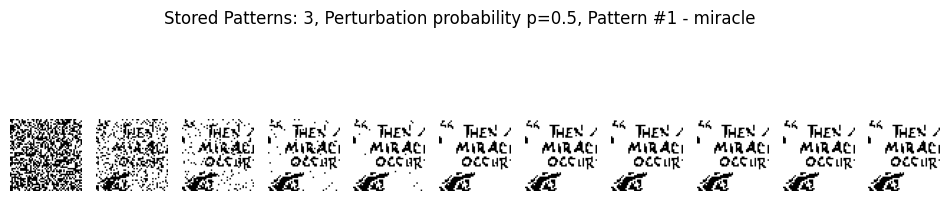

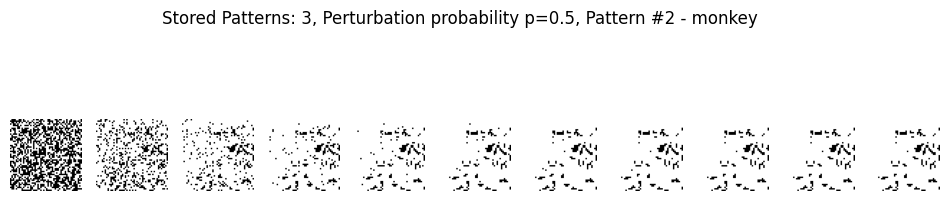

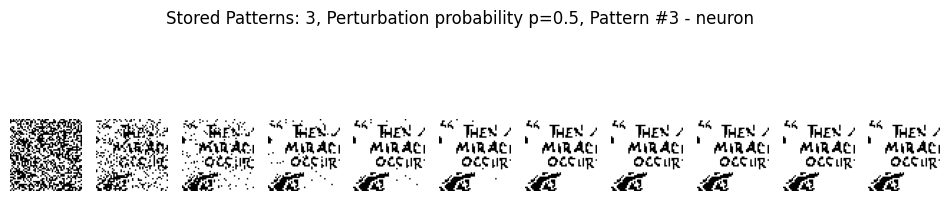

Perturbing patterns with probability p = 0.7


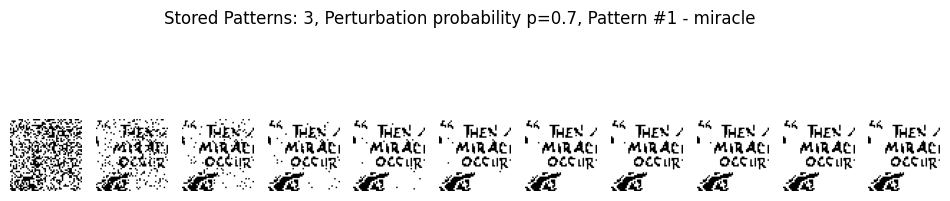

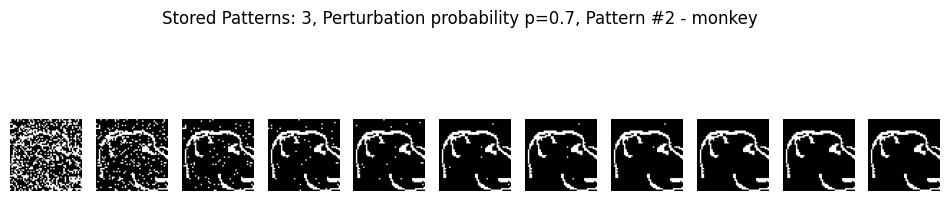

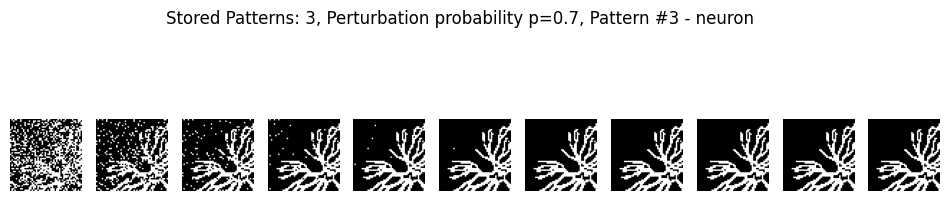

Storing 4 patterns
Perturbing patterns with probability p = 0


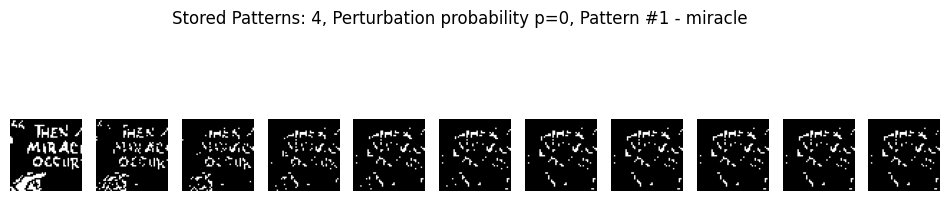

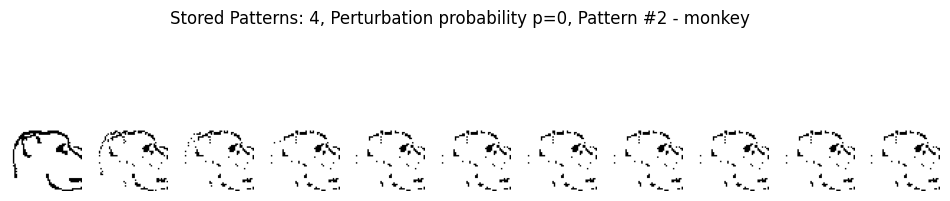

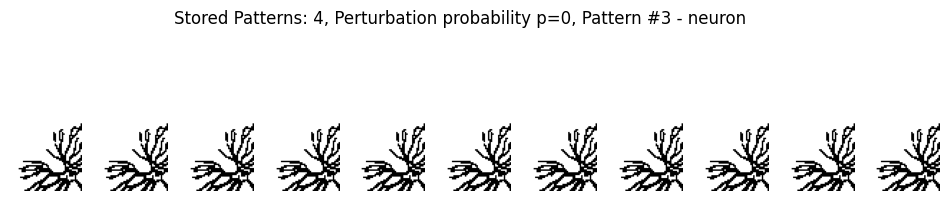

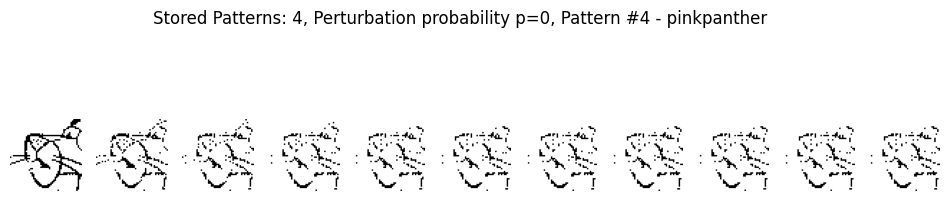

Perturbing patterns with probability p = 0.3


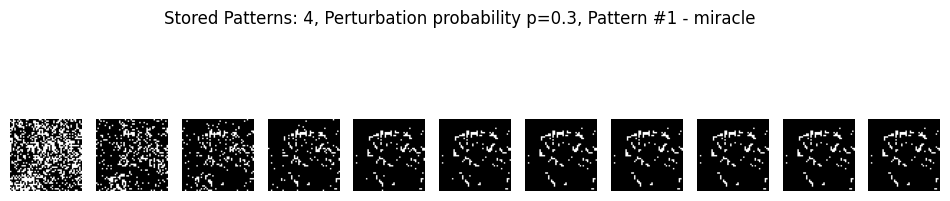

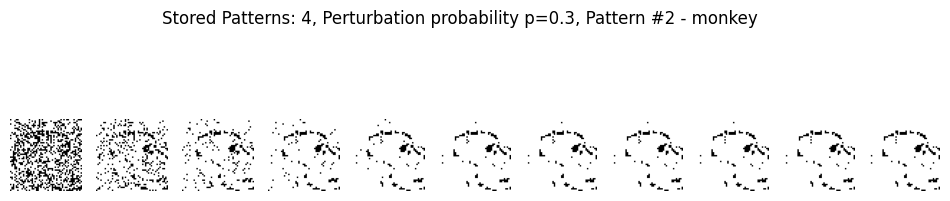

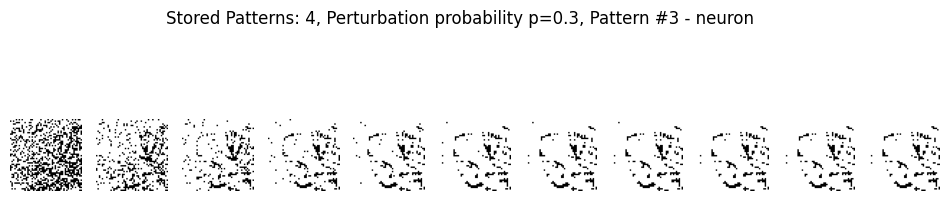

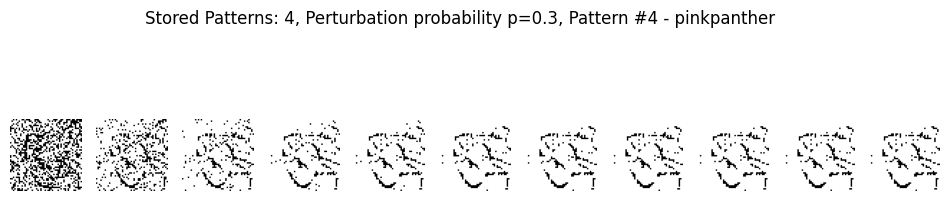

Perturbing patterns with probability p = 0.5


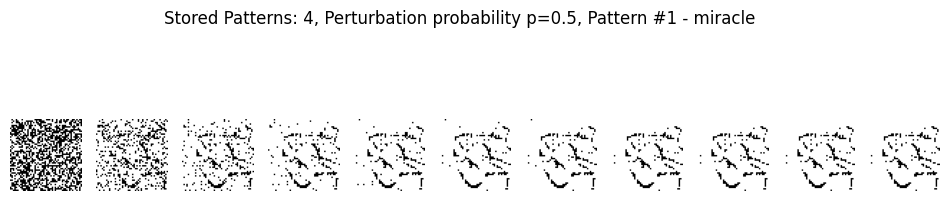

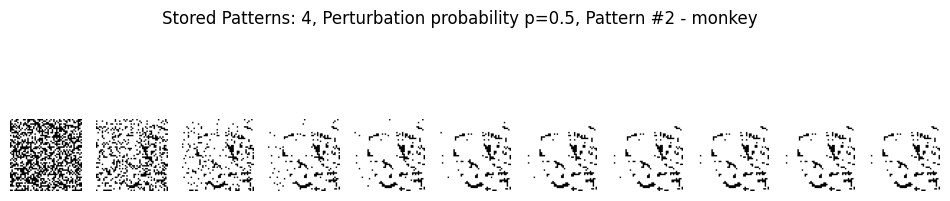

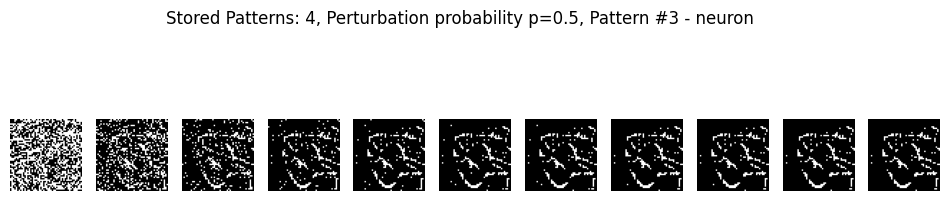

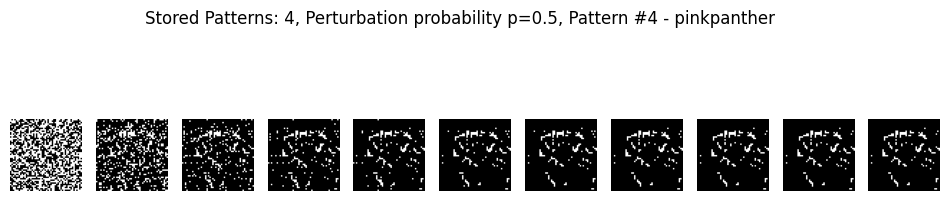

Perturbing patterns with probability p = 0.7


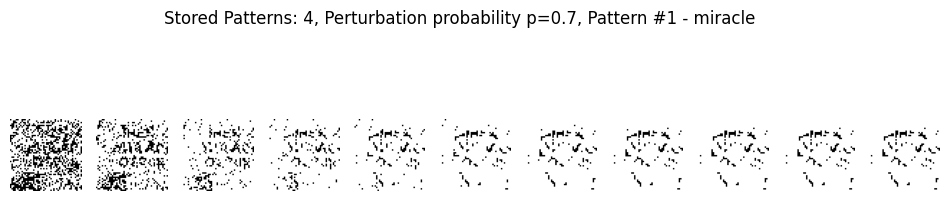

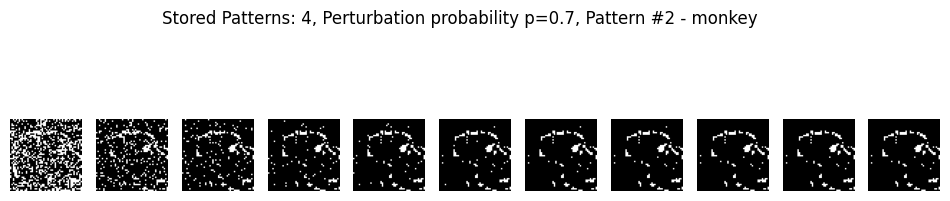

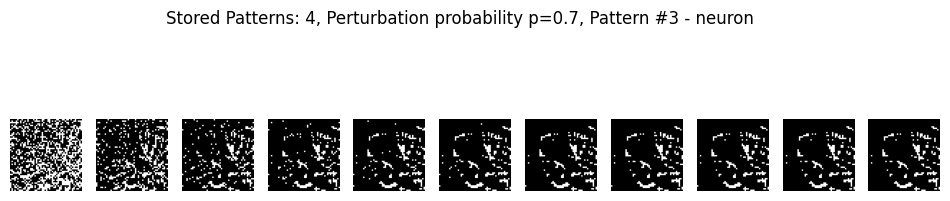

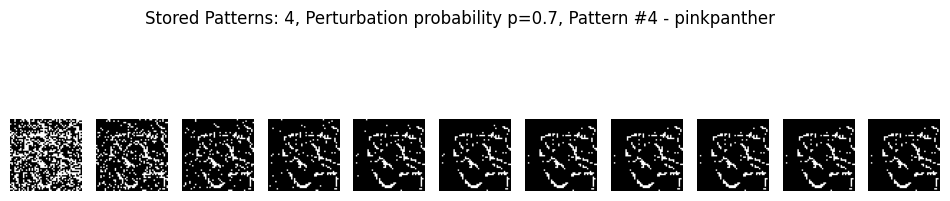

In [6]:
p_values = [0, 0.3, 0.5, 0.7]

for stored_patterns, num_patterns in zip([patterns_3, patterns_4], [3, 4]):
    print(f"Storing {num_patterns} patterns")
    hopfield = HopfieldNetwork(stored_patterns, list(patterns_dict.keys()))
    
    for p in p_values:
        print(f"Perturbing patterns with probability p = {p}")
        for pattern_idx, original_pattern in enumerate(stored_patterns):
            perturbed_pattern = hopfield.perturb_pattern(original_pattern.flatten(), p)
            
            states_over_time = hopfield.run_network(perturbed_pattern, max_iterations=10 * N)
            
            plot_title = f"Stored Patterns: {num_patterns}, Perturbation probability p={p}, Pattern #{pattern_idx+1} - {hopfield.pattern_idx_to_name[pattern_idx+1]}"
            hopfield.plot_patterns(np.array(states_over_time), plot_title)

## Discussion:

**How does performance change?**
- Assume $k$ is fixed. For small $p$, the convergence is good. We can see the pattern converges to a pattern and it produces a pattern very similar or even the same as the stored pattern. For larger $p$, convergence stability drastically decreases. In some cases, it converges to a stored pattern but not the correct one. In every case, the quality of the pattern converged to for larger $p$ is very low, and the difference between the converged pattern and the stored pattern is significant, although it isn't entirely random for any of the $p$ simulated on.
- When $k$ increases, we can see that the network converges to the wrong pattern more often for increasing $k$.